In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
c = -100
## ^ for posterity

def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#Now using the rk2 method
def I_RK2(t,h):
    f1 = F(t)
    f2 = F(t+h)

    part1 = f1*(h + (c*(h)**2)/2 + (c**2)*(h**3)/6)

    part2 =(f2-f1)*((h)/2 + c*(h**2)/6)

    return  (part1 + part2)
    

In [28]:
T = Total_Time = np.pi/2
N = Number_of_Points = 100
u_0 = Initial_Condition = 1
c = -100
h = T/N ## calculate the step size based on the number of points
tvec = np.arange(N+1)*h

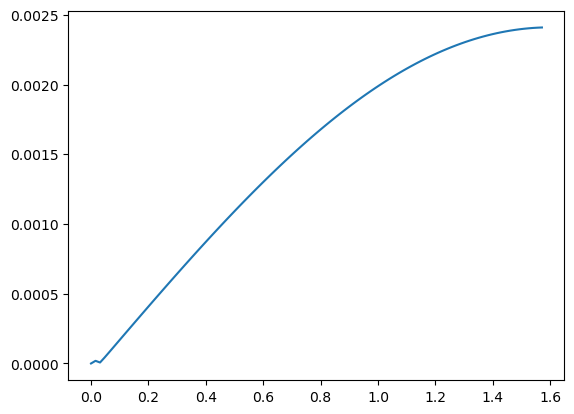

In [29]:
y,x = ETDRK2(T,N,u_0)
plt.plot(x,np.abs(y - U_true(x,1)))

In [30]:

def ETDRK2(Total_Time, Number_of_Points, Initial_Condition):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition

    h = T/N ## calculate the step size based on the number of points
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_RK2(tvec[i],h)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [31]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

In [32]:
errorN = 14
c = -100
## h = np.pi/(2*N)
## N = np.int((1.6)*10**)
Test_N = np.zeros(errorN)


for i in range(0,errorN):
    Test_N[i] = int((np.pi/2)*(10**(1+i/2)))
Test_H  = (np.pi/2)/Test_N

In [33]:
Error_Vec1 =np.zeros(errorN)
Error_Vec2 = np.zeros(errorN)
#k = np.array([])
for i in range(0, errorN):
    (y1,x) = ETDRK2(T, Test_N[i], u_0)
    #print(x.size)
    yTrue = U_true(x,u_0)
    y_tfinal = yTrue[-1]
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #k = np.append(k,np.abs((y1[-1] - yTrue[-1])/yTrue[-1]))
    print("you are", (i/errorN)*100, "% complete, and you are on step", i)
    Error_Vec1[i] = np.abs((y1[-1] - yTrue[-1])/yTrue[-1])
    Error_Vec2[i] = Test_H[i]**0.5*np.linalg.norm(y1-yTrue)

you are 0.0 % complete, and you are on step 0
you are 7.142857142857142 % complete, and you are on step 1
you are 14.285714285714285 % complete, and you are on step 2
you are 21.428571428571427 % complete, and you are on step 3
you are 28.57142857142857 % complete, and you are on step 4
you are 35.714285714285715 % complete, and you are on step 5
you are 42.857142857142854 % complete, and you are on step 6
you are 50.0 % complete, and you are on step 7
you are 57.14285714285714 % complete, and you are on step 8
you are 64.28571428571429 % complete, and you are on step 9
you are 71.42857142857143 % complete, and you are on step 10
you are 78.57142857142857 % complete, and you are on step 11
you are 85.71428571428571 % complete, and you are on step 12
you are 92.85714285714286 % complete, and you are on step 13


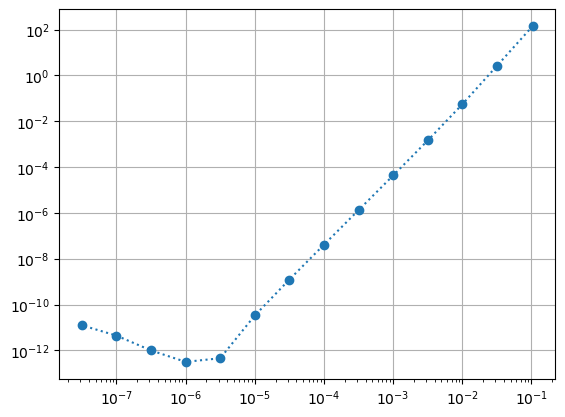

In [34]:
plt.loglog(Test_H, Error_Vec1, ':o')
plt.grid()

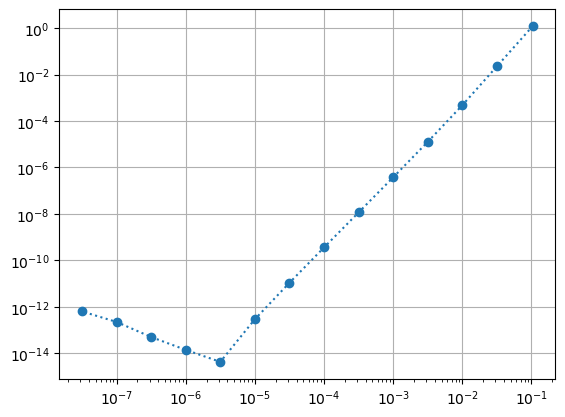

In [35]:
plt.loglog(Test_H, Error_Vec2, ':o')
plt.grid()
